In [105]:
import picamera
import datetime
from IPython.display import Image

camera.close()

In [106]:
camera = picamera.PiCamera()


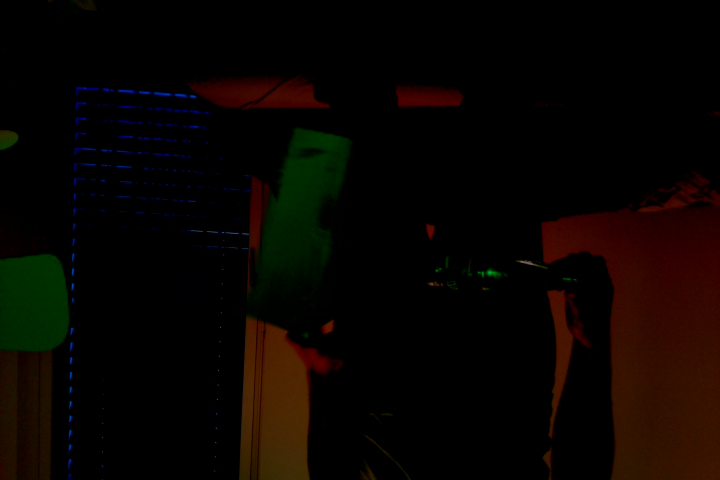

In [109]:
camera.saturation=100
camera.brightness=20

camera.capture("image.jpg")
Image(filename ='image.jpg')

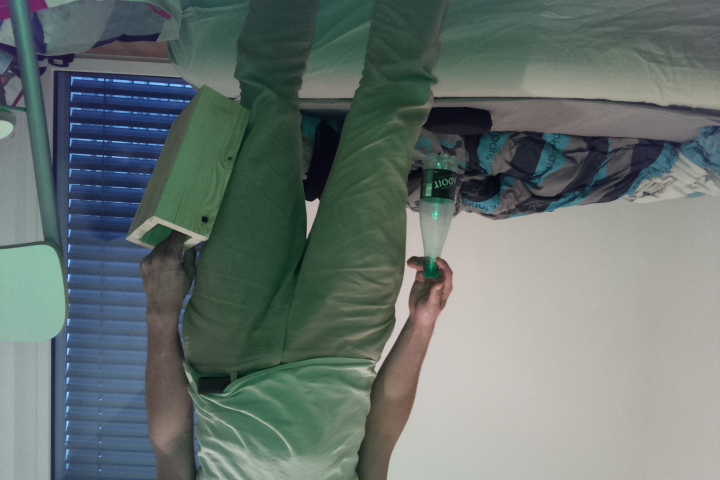

In [108]:

camera.capture("image.jpg")
Image(filename ='image.jpg')

In [2]:
camera.close()

NameError: name 'camera' is not defined

1694.0
462
1024.0
420


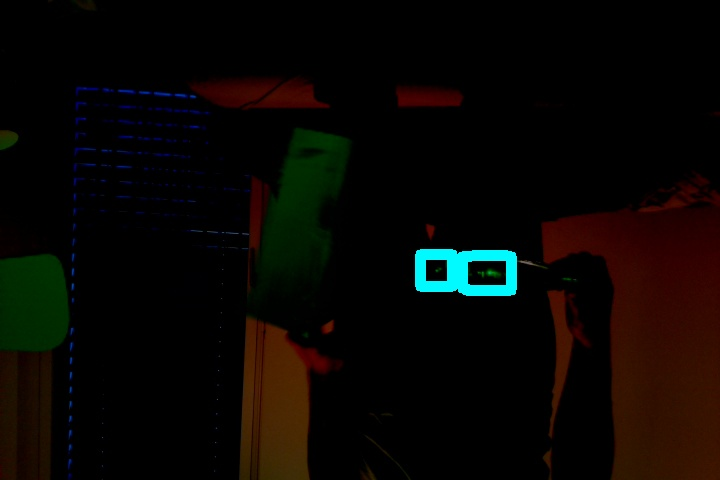

In [110]:
import cv2
import numpy as np
from IPython.display import Image

# Convert BGR to HSV
frame = cv2.imread("image.jpg")
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([40,40,100])
upper_blue = np.array([70,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

kernel = np.ones((5,5),np.uint8)
#mask = cv2.erode(mask,kernel,iterations = 0)
mask = cv2.dilate(mask,kernel,iterations = 8)
# Bitwise-AND mask and original image
#res = cv2.bitwise_and(frame,frame, mask= mask)

_, contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_list = []
for contour in contours:
    area = cv2.contourArea(contour)
    print(area)

    if area < 3000 and area > 50:
        contour_list.append(contour)
        x,y,w,h = cv2.boundingRect(contour)
        cv2.rectangle(mask, (x, y), (x + w, y + h), (0, 255,0), 2)
        center_x = x
        print(x)


cv2.drawContours(frame, contour_list,  -1, (255,250,0), 10)    
cv2.imwrite("bottle_flash_drawing.jpg",frame)
Image(filename ='bottle_flash_drawing.jpg')

In [33]:
import numpy as np
import cv2 as cv
from IPython.display import Image

face_cascade = cv.CascadeClassifier('test.xml')
img = cv.imread('bottle.bmp')

time: 0:00:00.269384


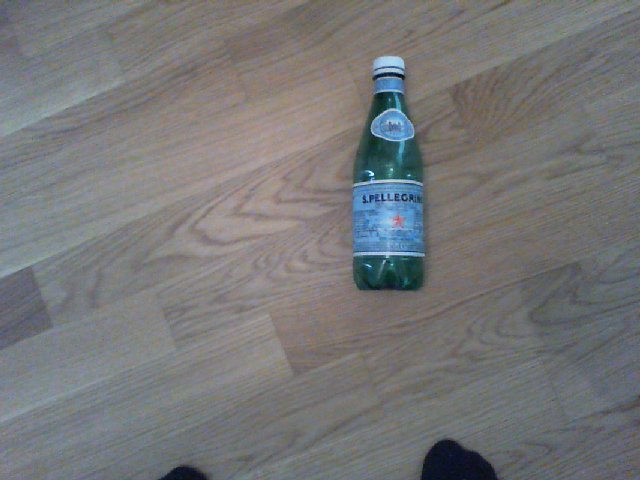

In [34]:
import datetime
start_time = datetime.datetime.now()
faces = face_cascade.detectMultiScale(img)
print("time: " + str(datetime.datetime.now() - start_time))   

for (x,y,w,h) in faces:
    cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
cv.imwrite("bottle_haar.png", img)
Image(filename ='bottle_haar.png')